<a href="https://colab.research.google.com/github/comHack/Mammography_DL_Classification/blob/master/SecondNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [101]:
import numpy as np

import pandas as pd

import cv2 as cv

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import random

import pickle

import shutil

import os

from google.colab import drive

# **Mounting Drive**

In [ ]:
drive.mount('/gdrive')
os.symlink('/gdrive/My Drive', '/content/gdrive')

# **Data**


### **Setup the data**

In [104]:
# data folder link to the images_resized_2 folder in your drive
data_folder = '/gdrive/My Drive/Breast Cancer Detection/images_resized_2'

# classes
classes = ['benign', 'malign']

In [ ]:
print(os.listdir(os.path.join(data_folder, classes[0])))

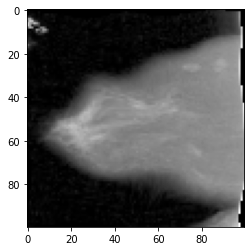

In [ ]:
num_image = 251
classe = 0
path = os.path.join(data_folder, classes[classe])
images = os.listdir(path)
image = os.path.join(path, images[num_image])
image_arr = cv.imread(image, cv.IMREAD_GRAYSCALE)
new_arr = image_arr / 255
plt.imshow(image_arr, cmap='gray')
plt.show()

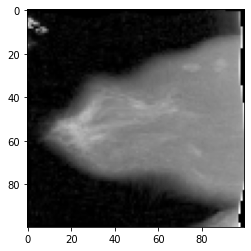

In [ ]:
plt.imshow(new_arr, cmap='gray')
plt.show()

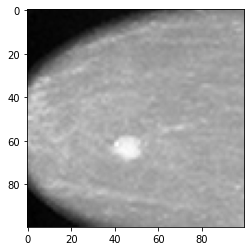

In [109]:
num_image = 189
classe = 1
path = os.path.join(data_folder, classes[classe])
images = os.listdir(path)
image = os.path.join(path, images[num_image])
image_arr = cv.imread(image, cv.IMREAD_GRAYSCALE)
new_arr = image_arr / 255
plt.imshow(image_arr, cmap='gray')
plt.show()

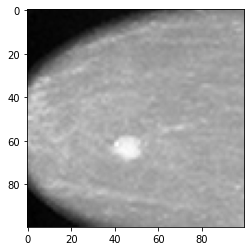

In [110]:
plt.imshow(new_arr, cmap='gray')
plt.show()

In [ ]:
print(image_arr.shape)

(100, 100)


In [ ]:
def create_data():
  '''
    create the data as grayscale images (1 channel (cv.IMREAD_GRAYSCALE))
    
    returns a list of pairs containing the image matrix and it's label
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image), cv.IMREAD_GRAYSCALE)
      data.append([image_arr, classe_num])
    
  return data

In [ ]:
def create_data_3():
  '''
    create the data as rgb images (3 channels)

    returns a list of pairs containing the image matrix and it's label 
  '''
  data = []
  for classe in classes:
    path = os.path.join(data_folder, classe)
    classe_num = classes.index(classe)
    for image in os.listdir(path):
      image_arr = cv.imread(os.path.join(path, image))
      data.append([image_arr, classe_num])
    
  return data

In [ ]:
# creating the data (grayscale images)
data = create_data()

In [ ]:
# creating the data (rgb images)
data_3 = create_data_3()

In [ ]:
A = data.copy()

In [ ]:
A_3 = data_3.copy()

In [ ]:
print(A_3[2])
print(len(A_3))

In [ ]:
# seperating the benign and the malign (grayscale images)
benign_data = A[:1988].copy()
malign_data = A[1988:].copy()

In [ ]:
# seperating the benign and the malign (rgb images)
benign_data_3 = A_3[:1988].copy()
malign_data_3 = A_3[1988:].copy()

In [ ]:
print(benign_data[1987][1])

In [ ]:
print(len(data))

3988


In [ ]:
print(len(benign_data))

1988


In [ ]:
print(len(malign_data))

2000


In [ ]:
#random.shuffle(data)

In [ ]:
# for x in data[:10]:
#   print(x[1])

In [ ]:
# saving the arrays as pickle files for later usage (grayscale images)
pickle_out = open("benign.pickle", "wb")
pickle.dump(benign_data, pickle_out)
pickle_out.close()

pickle_out = open("malign.pickle", "wb")
pickle.dump(malign_data, pickle_out)
pickle_out.close()

In [ ]:
# saving the arrays as pickle files for later usage (rgb images)
pickle_out = open("benign_3.pickle", "wb")
pickle.dump(benign_data_3, pickle_out)
pickle_out.close()

pickle_out = open("malign_3.pickle", "wb")
pickle.dump(malign_data_3, pickle_out)
pickle_out.close()

### **Import data**

#### **GRAYSCALE IMAGES**

In [ ]:
# setting the path to the pickle files saved  (grayscale images)
benign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/benign.pickle"

malign_link = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/GRAYSCALE IMAGES ARRAY/malign.pickle"

In [ ]:
# opening pickle files (grayscale images)
pickle_in = open(benign_link, "rb")
benign_data = pickle.load(pickle_in)

pickle_in = open(malign_link, "rb")
malign_data = pickle.load(pickle_in)

In [ ]:
# shuffle the data
random.shuffle(benign_data)
random.shuffle(malign_data)

In [ ]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b = int(len(benign_data) * train_per)

trn_m = int(len(malign_data) * train_per)

train_data = benign_data[: trn_b].copy() + malign_data[: trn_m].copy()

test_data = benign_data[trn_b :].copy() + malign_data[trn_m :].copy()

In [ ]:
# shuffle train and test data
random.shuffle(train_data)
random.shuffle(test_data)

In [ ]:
assert len(train_data + test_data) == len(benign_data + malign_data)

In [ ]:
# separating the features and labels

X_train = []
y_train = []

X_test = []
y_test = []

for X, y in train_data:
  X_train.append(X)
  y_train.append(y)

for X, y in test_data:
  X_test.append(X)
  y_test.append(y)


In [ ]:
# reshaping 

num_channels = 1 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train[0])

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train = np.array(y_train).reshape(-1)

IMG_SIZE = len(X_test[0])

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test = np.array(y_test).reshape(-1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2791, 100, 100, 1)
(1197, 100, 100, 1)


**Scaling**

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

#### **RGB IMAGES**

In [ ]:
# setting the path to the pickle files saved (rgb images)
benign_link_3 = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/benign_3.pickle"

malign_link_3 = "/content/gdrive/Copy of BCD/Breast Cancer Detection/Pickle files of images/RGB IMAGES ARRAY/malign_3.pickle"

In [ ]:
# opening saved data pickle files (rgb images)
pickle_in = open(benign_link_3, "rb")
benign_data_3 = pickle.load(pickle_in)

pickle_in = open(malign_link_3, "rb")
malign_data_3 = pickle.load(pickle_in)

In [ ]:
# shuffle the data
random.shuffle(benign_data_3)
random.shuffle(malign_data_3)

In [ ]:
# splitting and merging the data from benign and malign arrays

# split eg. train_per = 0.7 --> 70% train data, 30% test data
train_per = 0.7

trn_b_3 = int(len(benign_data_3) * train_per)

trn_m_3 = int(len(malign_data_3) * train_per)

train_data_3 = benign_data_3[: trn_b_3].copy() + malign_data_3[: trn_m_3].copy()

test_data_3 = benign_data_3[trn_b_3 :].copy() + malign_data_3[trn_m_3 :].copy()

In [ ]:
# shuffle train and test data
random.shuffle(train_data_3)
random.shuffle(test_data_3)

In [ ]:
assert len(train_data_3 + test_data_3) == len(benign_data_3 + malign_data_3)

In [ ]:
# separating the features and labels

X_train_3 = []
y_train_3 = []

X_test_3 = []
y_test_3 = []

for X, y in train_data_3:
  X_train_3.append(X)
  y_train_3.append(y)

for X, y in test_data_3:
  X_test_3.append(X)
  y_test_3.append(y)


In [ ]:
# reshaping 

num_channels = 3 # depend whether you're using rgb or grayscale images

IMG_SIZE = len(X_train_3[0])

X_train_3 = np.array(X_train_3).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_train_3 = np.array(y_train_3).reshape(-1)

IMG_SIZE = len(X_test_3[0])

X_test_3 = np.array(X_test_3).reshape(-1, IMG_SIZE, IMG_SIZE, num_channels)

y_test_3 = np.array(y_test_3).reshape(-1)

In [ ]:
print(X_train_3.shape)
print(X_test_3.shape)

(2791, 100, 100, 3)
(1197, 100, 100, 3)


**Scaling**

In [ ]:
X_train_3 = X_train_3 / 255
X_test_3 = X_test_3 / 255

# **Setting up the model**

## **Grayscale images**

In [ ]:
num_channels = 1

### **model**

In [ ]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               10240512  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.5860 - acc: 0.7101 - val_loss: 0.6118 - val_acc: 0.7393
Epoch 2/15
79/79 - 1s - loss: 0.4735 - acc: 0.7897 - val_loss: 0.4563 - val_acc: 0.7964
Epoch 3/15
79/79 - 1s - loss: 0.3876 - acc: 0.8303 - val_loss: 0.4474 - val_acc: 0.8179
Epoch 4/15
79/79 - 1s - loss: 0.3638 - acc: 0.8395 - val_loss: 0.4071 - val_acc: 0.8393
Epoch 5/15
79/79 - 1s - loss: 0.3162 - acc: 0.8586 - val_loss: 0.3679 - val_acc: 0.8464
Epoch 6/15
79/79 - 1s - loss: 0.2918 - acc: 0.8702 - val_loss: 0.3688 - val_acc: 0.8536
Epoch 7/15
79/79 - 1s - loss: 0.2677 - acc: 0.8869 - val_loss: 0.3462 - val_acc: 0.8714
Epoch 8/15
79/79 - 1s - loss: 0.2329 - acc: 0.8996 - val_loss: 0.3905 - val_acc: 0.8464
Epoch 9/15
79/79 - 1s - loss: 0.2234 - acc: 0.9048 - val_loss: 0.3525 - val_acc: 0.8750
Epoch 10/15
79/79 - 1s - loss: 0.1936 - acc: 0.9168 - val_loss: 0.4443 - val_acc: 0.8607
Epoch 11/15
79/79 - 1s - loss: 0.1926 - acc: 0.9188 - val_loss: 0.3431 - val_acc: 0.8536
Epoch 12/15
79/79 - 1s - loss:

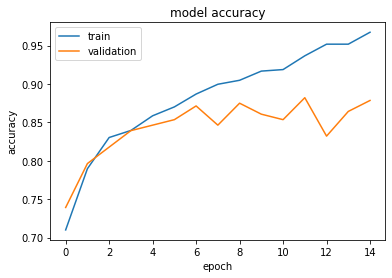

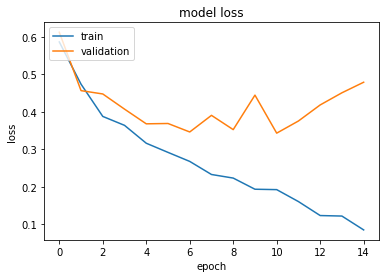

In [ ]:
# Plotting the accuracy of "model"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO**

In [ ]:
model_DO = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 16)      160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               10240512  
_________________________________________________________________
dropout (Dropout)            (None, 512)              

In [ ]:
model_DO.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO = model_DO.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6783 - acc: 0.6822 - val_loss: 0.5289 - val_acc: 0.7464
Epoch 2/15
79/79 - 1s - loss: 0.4818 - acc: 0.7901 - val_loss: 0.4752 - val_acc: 0.7857
Epoch 3/15
79/79 - 1s - loss: 0.4362 - acc: 0.8128 - val_loss: 0.4511 - val_acc: 0.8143
Epoch 4/15
79/79 - 1s - loss: 0.4045 - acc: 0.8188 - val_loss: 0.4062 - val_acc: 0.8071
Epoch 5/15
79/79 - 1s - loss: 0.3642 - acc: 0.8407 - val_loss: 0.3891 - val_acc: 0.8286
Epoch 6/15
79/79 - 1s - loss: 0.3424 - acc: 0.8534 - val_loss: 0.3780 - val_acc: 0.8357
Epoch 7/15
79/79 - 1s - loss: 0.3253 - acc: 0.8574 - val_loss: 0.3728 - val_acc: 0.8393
Epoch 8/15
79/79 - 1s - loss: 0.3042 - acc: 0.8626 - val_loss: 0.3561 - val_acc: 0.8571
Epoch 9/15
79/79 - 1s - loss: 0.2950 - acc: 0.8666 - val_loss: 0.3808 - val_acc: 0.8321
Epoch 10/15
79/79 - 1s - loss: 0.2522 - acc: 0.8965 - val_loss: 0.3717 - val_acc: 0.8500
Epoch 11/15
79/79 - 1s - loss: 0.2572 - acc: 0.8889 - val_loss: 0.3753 - val_acc: 0.8393
Epoch 12/15
79/79 - 1s - loss:

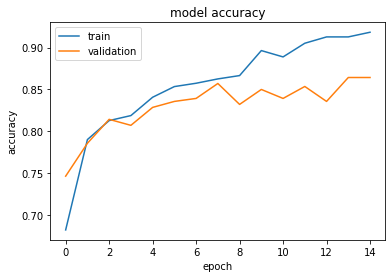

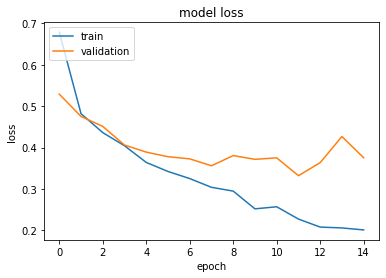

In [ ]:
# Accuracy of "model_DO"
plt.plot(result_DO.history['acc'])
plt.plot(result_DO.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO"
plt.plot(result_DO.history['loss'])
plt.plot(result_DO.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_less**

In [ ]:
model_DO_less = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO_less.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [ ]:
model_DO_less.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO_less = model_DO_less.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6446 - acc: 0.6543 - val_loss: 0.5476 - val_acc: 0.7607
Epoch 2/15
79/79 - 0s - loss: 0.5162 - acc: 0.7682 - val_loss: 0.5210 - val_acc: 0.7964
Epoch 3/15
79/79 - 0s - loss: 0.4794 - acc: 0.7985 - val_loss: 0.4458 - val_acc: 0.8000
Epoch 4/15
79/79 - 0s - loss: 0.4282 - acc: 0.8132 - val_loss: 0.4417 - val_acc: 0.8179
Epoch 5/15
79/79 - 0s - loss: 0.3943 - acc: 0.8288 - val_loss: 0.3862 - val_acc: 0.8357
Epoch 6/15
79/79 - 0s - loss: 0.3717 - acc: 0.8431 - val_loss: 0.3861 - val_acc: 0.8286
Epoch 7/15
79/79 - 0s - loss: 0.3651 - acc: 0.8423 - val_loss: 0.3726 - val_acc: 0.8286
Epoch 8/15
79/79 - 0s - loss: 0.3387 - acc: 0.8526 - val_loss: 0.3491 - val_acc: 0.8393
Epoch 9/15
79/79 - 0s - loss: 0.3185 - acc: 0.8674 - val_loss: 0.4110 - val_acc: 0.8429
Epoch 10/15
79/79 - 0s - loss: 0.3236 - acc: 0.8634 - val_loss: 0.3457 - val_acc: 0.8607
Epoch 11/15
79/79 - 0s - loss: 0.2959 - acc: 0.8702 - val_loss: 0.3329 - val_acc: 0.8607
Epoch 12/15
79/79 - 0s - loss:

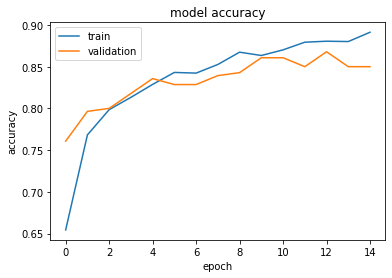

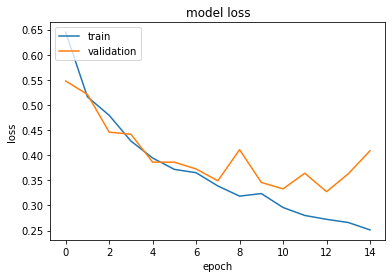

In [ ]:
# Accuracy of "model_DO_less"
plt.plot(result_DO_less.history['acc'])
plt.plot(result_DO_less.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_less"
plt.plot(result_DO_less.history['loss'])
plt.plot(result_DO_less.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_06_Dense_128**

In [ ]:
model_DO_06_Dense_128 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.6),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO_06_Dense_128.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
model_DO_06_Dense_128.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO_06_Dense_128 = model_DO_06_Dense_128.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 0s - loss: 0.6286 - acc: 0.6667 - val_loss: 0.5414 - val_acc: 0.7393
Epoch 2/15
79/79 - 0s - loss: 0.5016 - acc: 0.7782 - val_loss: 0.4851 - val_acc: 0.8000
Epoch 3/15
79/79 - 0s - loss: 0.4572 - acc: 0.8065 - val_loss: 0.4637 - val_acc: 0.8179
Epoch 4/15
79/79 - 0s - loss: 0.4248 - acc: 0.8212 - val_loss: 0.4360 - val_acc: 0.8107
Epoch 5/15
79/79 - 0s - loss: 0.3922 - acc: 0.8307 - val_loss: 0.3833 - val_acc: 0.8321
Epoch 6/15
79/79 - 0s - loss: 0.3769 - acc: 0.8367 - val_loss: 0.3773 - val_acc: 0.8321
Epoch 7/15
79/79 - 0s - loss: 0.3591 - acc: 0.8419 - val_loss: 0.3972 - val_acc: 0.8143
Epoch 8/15
79/79 - 0s - loss: 0.3609 - acc: 0.8475 - val_loss: 0.3527 - val_acc: 0.8464
Epoch 9/15
79/79 - 0s - loss: 0.3398 - acc: 0.8519 - val_loss: 0.3544 - val_acc: 0.8393
Epoch 10/15
79/79 - 0s - loss: 0.3236 - acc: 0.8614 - val_loss: 0.3550 - val_acc: 0.8321
Epoch 11/15
79/79 - 0s - loss: 0.3151 - acc: 0.8678 - val_loss: 0.3360 - val_acc: 0.8464
Epoch 12/15
79/79 - 0s - loss:

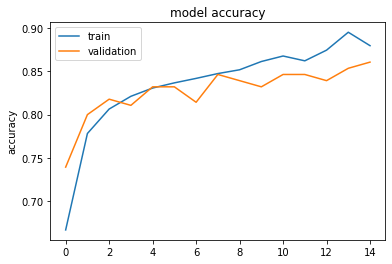

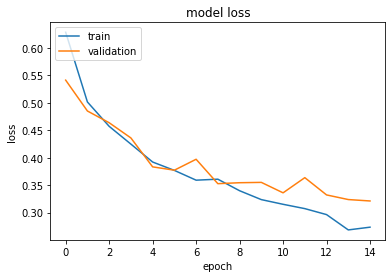

In [ ]:
# Accuracy of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['acc'])
plt.plot(result_DO_06_Dense_128.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.xlabel('epoch')

# Loss of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['loss'])
plt.plot(result_DO_06_Dense_128.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_04_Dense_256**

In [ ]:
model_DO_04_Dense_256 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(256, activation='relu'),

     Dropout(0.4),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO_04_Dense_256.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [ ]:
model_DO_04_Dense_256.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO_04_Dense_256 = model_DO_04_Dense_256.fit(
    x = X_train,
    y = y_train,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6198 - acc: 0.6611 - val_loss: 0.5317 - val_acc: 0.7464
Epoch 2/15
79/79 - 0s - loss: 0.4923 - acc: 0.7770 - val_loss: 0.4678 - val_acc: 0.8000
Epoch 3/15
79/79 - 0s - loss: 0.4341 - acc: 0.8136 - val_loss: 0.4309 - val_acc: 0.8214
Epoch 4/15
79/79 - 0s - loss: 0.4043 - acc: 0.8220 - val_loss: 0.4195 - val_acc: 0.8071
Epoch 5/15
79/79 - 0s - loss: 0.3658 - acc: 0.8363 - val_loss: 0.3742 - val_acc: 0.8321
Epoch 6/15
79/79 - 0s - loss: 0.3382 - acc: 0.8526 - val_loss: 0.3867 - val_acc: 0.8250
Epoch 7/15
79/79 - 0s - loss: 0.3269 - acc: 0.8562 - val_loss: 0.3565 - val_acc: 0.8393
Epoch 8/15
79/79 - 0s - loss: 0.2953 - acc: 0.8753 - val_loss: 0.3435 - val_acc: 0.8464
Epoch 9/15
79/79 - 0s - loss: 0.2819 - acc: 0.8753 - val_loss: 0.3409 - val_acc: 0.8679
Epoch 10/15
79/79 - 0s - loss: 0.2537 - acc: 0.8901 - val_loss: 0.4335 - val_acc: 0.8321
Epoch 11/15
79/79 - 0s - loss: 0.2429 - acc: 0.8980 - val_loss: 0.3541 - val_acc: 0.8714
Epoch 12/15
79/79 - 0s - loss:

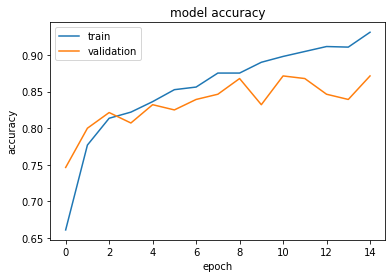

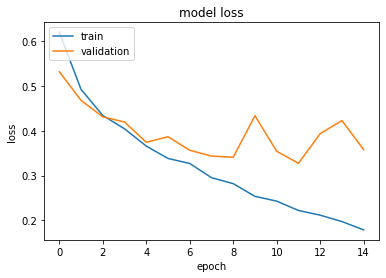

In [ ]:
# Accuracy of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['acc'])
plt.plot(result_DO_04_Dense_256.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['loss'])
plt.plot(result_DO_04_Dense_256.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## **RGB images**

In [ ]:
num_channels = 3

### **model**

In [ ]:
model = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result = model.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6296 - acc: 0.7109 - val_loss: 0.4654 - val_acc: 0.7964
Epoch 2/15
79/79 - 1s - loss: 0.4356 - acc: 0.8160 - val_loss: 0.4084 - val_acc: 0.8143
Epoch 3/15
79/79 - 1s - loss: 0.3769 - acc: 0.8355 - val_loss: 0.3766 - val_acc: 0.8393
Epoch 4/15
79/79 - 1s - loss: 0.3252 - acc: 0.8566 - val_loss: 0.3299 - val_acc: 0.8679
Epoch 5/15
79/79 - 1s - loss: 0.3001 - acc: 0.8734 - val_loss: 0.3689 - val_acc: 0.8393
Epoch 6/15
79/79 - 1s - loss: 0.2703 - acc: 0.8813 - val_loss: 0.2937 - val_acc: 0.8786
Epoch 7/15
79/79 - 1s - loss: 0.2426 - acc: 0.8957 - val_loss: 0.3353 - val_acc: 0.8464
Epoch 8/15
79/79 - 1s - loss: 0.2046 - acc: 0.9108 - val_loss: 0.3150 - val_acc: 0.8714
Epoch 9/15
79/79 - 1s - loss: 0.2018 - acc: 0.9068 - val_loss: 0.3190 - val_acc: 0.8714
Epoch 10/15
79/79 - 1s - loss: 0.1754 - acc: 0.9231 - val_loss: 0.3365 - val_acc: 0.8786
Epoch 11/15
79/79 - 1s - loss: 0.1696 - acc: 0.9295 - val_loss: 0.3066 - val_acc: 0.8893
Epoch 12/15
79/79 - 1s - loss:

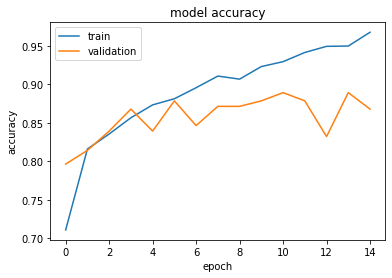

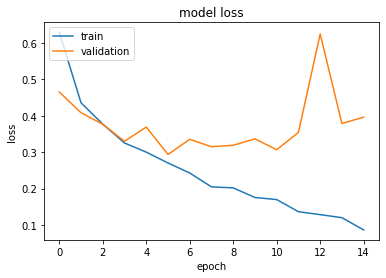

In [ ]:
# Plotting the accuracy of "model"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO**

In [ ]:
model_DO = tf.keras.models.Sequential(
    [
     
     Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(32, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(512, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               10240512  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

In [ ]:
model_DO.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO = model_DO.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.7079 - acc: 0.6483 - val_loss: 0.5399 - val_acc: 0.7357
Epoch 2/15
79/79 - 1s - loss: 0.4994 - acc: 0.7786 - val_loss: 0.4389 - val_acc: 0.8179
Epoch 3/15
79/79 - 1s - loss: 0.4394 - acc: 0.8124 - val_loss: 0.3948 - val_acc: 0.8357
Epoch 4/15
79/79 - 1s - loss: 0.4014 - acc: 0.8260 - val_loss: 0.3810 - val_acc: 0.8500
Epoch 5/15
79/79 - 1s - loss: 0.3726 - acc: 0.8355 - val_loss: 0.3647 - val_acc: 0.8357
Epoch 6/15
79/79 - 1s - loss: 0.3420 - acc: 0.8530 - val_loss: 0.3414 - val_acc: 0.8714
Epoch 7/15
79/79 - 1s - loss: 0.3217 - acc: 0.8566 - val_loss: 0.3385 - val_acc: 0.8643
Epoch 8/15
79/79 - 1s - loss: 0.3122 - acc: 0.8618 - val_loss: 0.3360 - val_acc: 0.8571
Epoch 9/15
79/79 - 1s - loss: 0.2942 - acc: 0.8678 - val_loss: 0.3257 - val_acc: 0.8643
Epoch 10/15
79/79 - 1s - loss: 0.2621 - acc: 0.8833 - val_loss: 0.3205 - val_acc: 0.8643
Epoch 11/15
79/79 - 1s - loss: 0.2531 - acc: 0.8873 - val_loss: 0.3205 - val_acc: 0.8750
Epoch 12/15
79/79 - 1s - loss:

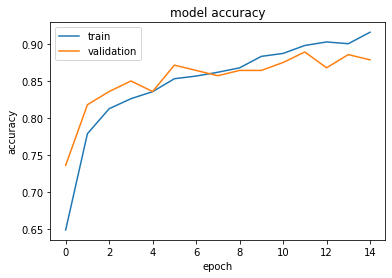

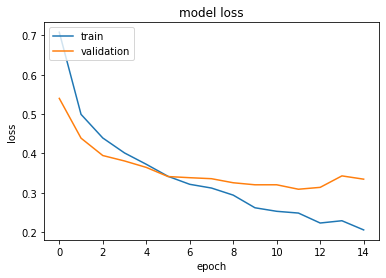

In [ ]:
# Accuracy of "model_DO"
plt.plot(result_DO.history['acc'])
plt.plot(result_DO.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO"
plt.plot(result_DO.history['loss'])
plt.plot(result_DO.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_less**

In [ ]:
model_DO_less = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.5),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO_less.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
model_DO_less.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO_less = model_DO_less.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.5825 - acc: 0.7157 - val_loss: 0.4786 - val_acc: 0.8000
Epoch 2/15
79/79 - 0s - loss: 0.4780 - acc: 0.7929 - val_loss: 0.4030 - val_acc: 0.8357
Epoch 3/15
79/79 - 0s - loss: 0.4256 - acc: 0.8172 - val_loss: 0.3991 - val_acc: 0.8429
Epoch 4/15
79/79 - 0s - loss: 0.4087 - acc: 0.8168 - val_loss: 0.3665 - val_acc: 0.8464
Epoch 5/15
79/79 - 0s - loss: 0.3630 - acc: 0.8435 - val_loss: 0.4128 - val_acc: 0.8036
Epoch 6/15
79/79 - 0s - loss: 0.3577 - acc: 0.8499 - val_loss: 0.3703 - val_acc: 0.8321
Epoch 7/15
79/79 - 0s - loss: 0.3330 - acc: 0.8610 - val_loss: 0.3275 - val_acc: 0.8571
Epoch 8/15
79/79 - 0s - loss: 0.3053 - acc: 0.8710 - val_loss: 0.3310 - val_acc: 0.8714
Epoch 9/15
79/79 - 0s - loss: 0.2837 - acc: 0.8769 - val_loss: 0.2971 - val_acc: 0.8893
Epoch 10/15
79/79 - 0s - loss: 0.2718 - acc: 0.8853 - val_loss: 0.3069 - val_acc: 0.8821
Epoch 11/15
79/79 - 0s - loss: 0.2621 - acc: 0.8881 - val_loss: 0.3086 - val_acc: 0.8750
Epoch 12/15
79/79 - 0s - loss:

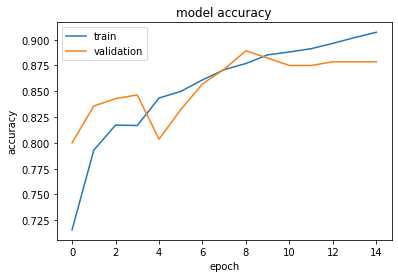

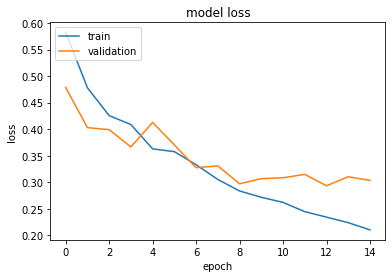

In [ ]:
# Accuracy of "model_DO_less"
plt.plot(result_DO_less.history['acc'])
plt.plot(result_DO_less.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_less"
plt.plot(result_DO_less.history['loss'])
plt.plot(result_DO_less.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_06_Dense_128**

In [ ]:
model_DO_06_Dense_128 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(128, activation='relu'),

     Dropout(0.6),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO_06_Dense_128.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [ ]:
model_DO_06_Dense_128.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO_06_Dense_128 = model_DO_06_Dense_128.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6308 - acc: 0.6663 - val_loss: 0.5302 - val_acc: 0.7607
Epoch 2/15
79/79 - 0s - loss: 0.5158 - acc: 0.7670 - val_loss: 0.4601 - val_acc: 0.8036
Epoch 3/15
79/79 - 0s - loss: 0.4525 - acc: 0.8112 - val_loss: 0.3955 - val_acc: 0.8429
Epoch 4/15
79/79 - 0s - loss: 0.4141 - acc: 0.8268 - val_loss: 0.3810 - val_acc: 0.8464
Epoch 5/15
79/79 - 0s - loss: 0.3873 - acc: 0.8363 - val_loss: 0.3564 - val_acc: 0.8393
Epoch 6/15
79/79 - 0s - loss: 0.3598 - acc: 0.8451 - val_loss: 0.3331 - val_acc: 0.8679
Epoch 7/15
79/79 - 0s - loss: 0.3386 - acc: 0.8511 - val_loss: 0.3157 - val_acc: 0.8679
Epoch 8/15
79/79 - 0s - loss: 0.3169 - acc: 0.8650 - val_loss: 0.3742 - val_acc: 0.8571
Epoch 9/15
79/79 - 0s - loss: 0.3187 - acc: 0.8666 - val_loss: 0.3137 - val_acc: 0.8786
Epoch 10/15
79/79 - 0s - loss: 0.3280 - acc: 0.8586 - val_loss: 0.3148 - val_acc: 0.8750
Epoch 11/15
79/79 - 0s - loss: 0.2985 - acc: 0.8742 - val_loss: 0.3124 - val_acc: 0.8786
Epoch 12/15
79/79 - 0s - loss:

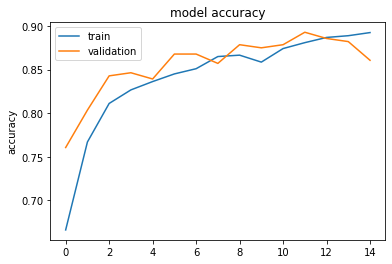

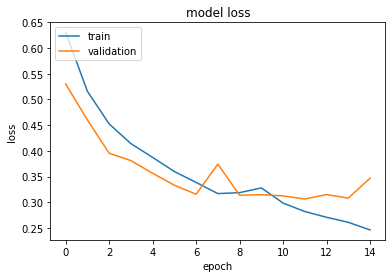

In [ ]:
# Accuracy of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['acc'])
plt.plot(result_DO_06_Dense_128.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.xlabel('epoch')

# Loss of "model_DO_06_Dense_128"
plt.plot(result_DO_06_Dense_128.history['loss'])
plt.plot(result_DO_06_Dense_128.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### **model_DO_04_Dense_256**

In [ ]:
model_DO_04_Dense_256 = tf.keras.models.Sequential(
    [
     
     Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(100,100,num_channels)),
     MaxPooling2D(2,2),

     Conv2D(16, (3,3), padding='same', activation='relu'),
     MaxPooling2D(2,2),

     Flatten(),

     Dense(256, activation='relu'),

     Dropout(0.4),

     Dense(1, activation='sigmoid')
     
    ]
)

In [ ]:
model_DO_04_Dense_256.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               2560256   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)              

In [ ]:
model_DO_04_Dense_256.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_DO_04_Dense_256 = model_DO_04_Dense_256.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 1s - loss: 0.6768 - acc: 0.6161 - val_loss: 0.5310 - val_acc: 0.7571
Epoch 2/15
79/79 - 0s - loss: 0.5233 - acc: 0.7555 - val_loss: 0.4678 - val_acc: 0.7964
Epoch 3/15
79/79 - 0s - loss: 0.4622 - acc: 0.7969 - val_loss: 0.4133 - val_acc: 0.8036
Epoch 4/15
79/79 - 0s - loss: 0.4147 - acc: 0.8244 - val_loss: 0.3933 - val_acc: 0.8357
Epoch 5/15
79/79 - 0s - loss: 0.3780 - acc: 0.8395 - val_loss: 0.3817 - val_acc: 0.8107
Epoch 6/15
79/79 - 0s - loss: 0.3599 - acc: 0.8427 - val_loss: 0.3706 - val_acc: 0.8321
Epoch 7/15
79/79 - 0s - loss: 0.3496 - acc: 0.8495 - val_loss: 0.3446 - val_acc: 0.8679
Epoch 8/15
79/79 - 0s - loss: 0.3207 - acc: 0.8662 - val_loss: 0.3299 - val_acc: 0.8643
Epoch 9/15
79/79 - 0s - loss: 0.2944 - acc: 0.8785 - val_loss: 0.3334 - val_acc: 0.8643
Epoch 10/15
79/79 - 0s - loss: 0.2814 - acc: 0.8789 - val_loss: 0.3115 - val_acc: 0.8714
Epoch 11/15
79/79 - 0s - loss: 0.2725 - acc: 0.8797 - val_loss: 0.3179 - val_acc: 0.8714
Epoch 12/15
79/79 - 0s - loss:

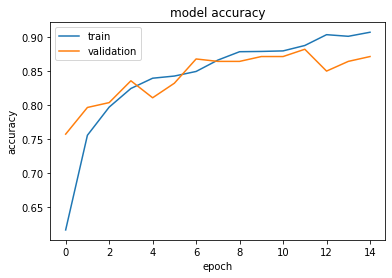

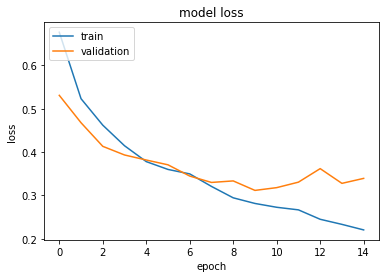

In [ ]:
# Accuracy of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['acc'])
plt.plot(result_DO_04_Dense_256.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "model_DO_04_Dense_256"
plt.plot(result_DO_04_Dense_256.history['loss'])
plt.plot(result_DO_04_Dense_256.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **model_vgg**

#### **vgg without dropout**

In [ ]:
vgg = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(100, 100, 3)
    )
# vgg.trainable = False

for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
last_layer = vgg.get_layer('block4_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 512)


In [ ]:
x = Flatten()(last_output)

x = Dense(256, activation='relu')(x)
#x = Dense(256, activation='relu')(x)

x = Dense(1, activation='sigmoid')(x)

model_vgg = Model(vgg.input, outputs=x)


In [ ]:
model_vgg.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [ ]:
model_vgg.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
result_model_vgg = model_vgg.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 3s - loss: 1.6780 - acc: 0.5269 - val_loss: 0.6077 - val_acc: 0.7464
Epoch 2/15
79/79 - 2s - loss: 0.5161 - acc: 0.7471 - val_loss: 0.4413 - val_acc: 0.8464
Epoch 3/15
79/79 - 2s - loss: 0.3689 - acc: 0.8343 - val_loss: 0.3811 - val_acc: 0.8429
Epoch 4/15
79/79 - 2s - loss: 0.2942 - acc: 0.8829 - val_loss: 0.3735 - val_acc: 0.8571
Epoch 5/15
79/79 - 2s - loss: 0.2368 - acc: 0.9100 - val_loss: 0.3136 - val_acc: 0.8571
Epoch 6/15
79/79 - 2s - loss: 0.1952 - acc: 0.9267 - val_loss: 0.3618 - val_acc: 0.8786
Epoch 7/15
79/79 - 2s - loss: 0.1462 - acc: 0.9510 - val_loss: 0.3298 - val_acc: 0.8571
Epoch 8/15
79/79 - 2s - loss: 0.1142 - acc: 0.9677 - val_loss: 0.3179 - val_acc: 0.8857
Epoch 9/15
79/79 - 2s - loss: 0.0886 - acc: 0.9785 - val_loss: 0.3048 - val_acc: 0.8893
Epoch 10/15
79/79 - 2s - loss: 0.0663 - acc: 0.9888 - val_loss: 0.2912 - val_acc: 0.8857
Epoch 11/15
79/79 - 2s - loss: 0.0533 - acc: 0.9908 - val_loss: 0.3119 - val_acc: 0.8929
Epoch 12/15
79/79 - 2s - loss:

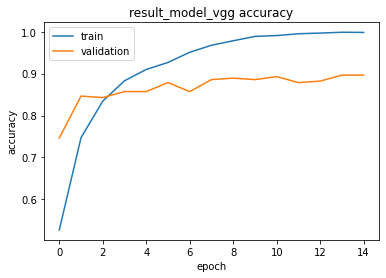

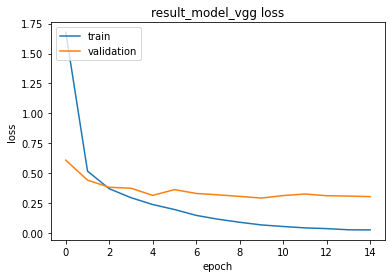

In [ ]:
# Accuracy of "result_model_vgg"
plt.plot(result_model_vgg.history['acc'])
plt.plot(result_model_vgg.history['val_acc'])
plt.title('result_model_vgg accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "result_model_vgg"
plt.plot(result_model_vgg.history['loss'])
plt.plot(result_model_vgg.history['val_loss'])
plt.title('result_model_vgg loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### **vgg with dropout**

In [ ]:
vgg_do = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(100, 100, 3)
    )
# vgg.trainable = False

for layer in vgg_do.layers:
  layer.trainable = False

In [ ]:
vgg_do.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
last_layer = vgg_do.get_layer('block4_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 512)


In [ ]:
x = Flatten()(last_output)

x = Dense(256, activation='relu')(x)
#x = Dense(256, activation='relu')(x)

x = Dropout(0.3)(x)

x = Dense(1, activation='sigmoid')(x)

model_vgg_do = Model(vgg_do.input, outputs=x)

In [ ]:
model_vgg_do.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [ ]:
model_vgg_do.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
"""
result_model_vgg_do = model_vgg_do.fit(
    train_generator,
    steps_per_epoch = 160,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 20,
    verbose = 2
)
"""

result_model_vgg_do = model_vgg_do.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)


Epoch 1/15
79/79 - 3s - loss: 1.7071 - acc: 0.7005 - val_loss: 0.3981 - val_acc: 0.8429
Epoch 2/15
79/79 - 2s - loss: 0.4024 - acc: 0.8196 - val_loss: 0.3538 - val_acc: 0.8679
Epoch 3/15
79/79 - 2s - loss: 0.3036 - acc: 0.8777 - val_loss: 0.3412 - val_acc: 0.8571
Epoch 4/15
79/79 - 2s - loss: 0.2829 - acc: 0.8765 - val_loss: 0.3827 - val_acc: 0.8643
Epoch 5/15
79/79 - 2s - loss: 0.2264 - acc: 0.9004 - val_loss: 0.3401 - val_acc: 0.8643
Epoch 6/15
79/79 - 2s - loss: 0.1839 - acc: 0.9307 - val_loss: 0.2660 - val_acc: 0.8821
Epoch 7/15
79/79 - 2s - loss: 0.1455 - acc: 0.9462 - val_loss: 0.3202 - val_acc: 0.8893
Epoch 8/15
79/79 - 2s - loss: 0.1261 - acc: 0.9534 - val_loss: 0.2821 - val_acc: 0.8821
Epoch 9/15
79/79 - 3s - loss: 0.1336 - acc: 0.9454 - val_loss: 0.2997 - val_acc: 0.9000
Epoch 10/15
79/79 - 3s - loss: 0.0926 - acc: 0.9606 - val_loss: 0.4322 - val_acc: 0.8821
Epoch 11/15
79/79 - 3s - loss: 0.0907 - acc: 0.9658 - val_loss: 0.3402 - val_acc: 0.8964
Epoch 12/15
79/79 - 3s - loss:

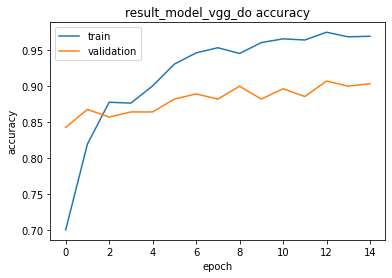

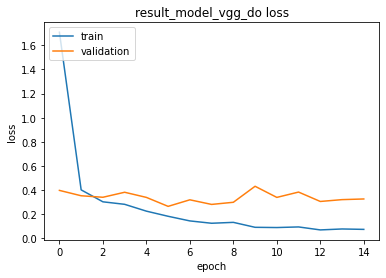

In [ ]:
# Accuracy of "result_model_vgg_do"
plt.plot(result_model_vgg_do.history['acc'])
plt.plot(result_model_vgg_do.history['val_acc'])
plt.title('result_model_vgg_do accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "result_model_vgg_do"
plt.plot(result_model_vgg_do.history['loss'])
plt.plot(result_model_vgg_do.history['val_loss'])
plt.title('result_model_vgg_do loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
vgg_do_block5 = VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(100, 100, 3)
    )
# vgg.trainable = False

for layer in vgg_do_block5.layers:
  layer.trainable = False

In [ ]:
vgg_do_block5.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
last_layer = vgg_do_block5.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 512)


In [ ]:
x = Flatten()(last_output)

x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(1, activation='sigmoid')(x)

model_vgg_do_block5 = Model(vgg_do_block5.input, outputs=x)

In [ ]:
model_vgg_do_block5.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [ ]:
model_vgg_do_block5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['acc']
)

In [ ]:
result_model_vgg_do_block5 = model_vgg_do_block5.fit(
    x = X_train_3,
    y = y_train_3,
    batch_size = 32,
    epochs = 15,
    validation_split = 0.1,
    verbose = 2
)

Epoch 1/15
79/79 - 3s - loss: 0.6694 - acc: 0.6221 - val_loss: 0.5503 - val_acc: 0.7500
Epoch 2/15
79/79 - 3s - loss: 0.5504 - acc: 0.7328 - val_loss: 0.5101 - val_acc: 0.7643
Epoch 3/15
79/79 - 3s - loss: 0.4949 - acc: 0.7611 - val_loss: 0.5900 - val_acc: 0.7071
Epoch 4/15
79/79 - 3s - loss: 0.4548 - acc: 0.7913 - val_loss: 0.4624 - val_acc: 0.7964
Epoch 5/15
79/79 - 3s - loss: 0.4286 - acc: 0.8041 - val_loss: 0.4371 - val_acc: 0.8107
Epoch 6/15
79/79 - 3s - loss: 0.4160 - acc: 0.8045 - val_loss: 0.4134 - val_acc: 0.8429
Epoch 7/15
79/79 - 3s - loss: 0.3798 - acc: 0.8295 - val_loss: 0.4193 - val_acc: 0.8179
Epoch 8/15
79/79 - 3s - loss: 0.3913 - acc: 0.8268 - val_loss: 0.3977 - val_acc: 0.8321
Epoch 9/15
79/79 - 3s - loss: 0.3551 - acc: 0.8375 - val_loss: 0.3886 - val_acc: 0.8464
Epoch 10/15
79/79 - 3s - loss: 0.2997 - acc: 0.8742 - val_loss: 0.4028 - val_acc: 0.8464
Epoch 11/15
79/79 - 3s - loss: 0.3019 - acc: 0.8710 - val_loss: 0.3718 - val_acc: 0.8321
Epoch 12/15
79/79 - 3s - loss:

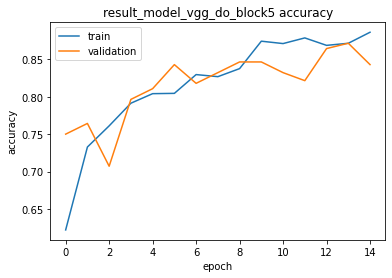

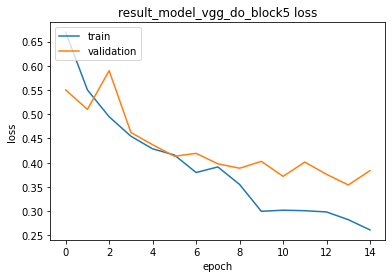

In [ ]:
# Accuracy of "result_model_vgg_do_block5"
plt.plot(result_model_vgg_do_block5.history['acc'])
plt.plot(result_model_vgg_do_block5.history['val_acc'])
plt.title('result_model_vgg_do_block5 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss of "result_model_vgg_do_block5"
plt.plot(result_model_vgg_do_block5.history['loss'])
plt.plot(result_model_vgg_do_block5.history['val_loss'])
plt.title('result_model_vgg_do_block5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### **model_resnet**

### **model_inception**